In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Prepare

In [2]:
df_lose= pd.read_csv("C:\\Users\\17890\\Desktop\\CS668\\match_loser_data_version1.csv")
df_win=pd.read_csv("C:\\Users\\17890\Desktop\\CS668\\match_winner_data_version1.csv")

In [3]:
df_lose.drop(df_lose.columns[[0]], axis=1, inplace=True) 
df_lose.drop(['gameId'], axis = 1,inplace=True)
df_win.drop(df_win.columns[[0]], axis=1, inplace=True)
df_win.drop(['gameId'], axis = 1,inplace=True) 

In [4]:
df_win[['firstBlood', 'firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald']] = df_win[['firstBlood', 'firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald']].astype(int)
df_win=df_win.drop(['bans'], axis=1)
df_win.win[df_win.win == 'Win'] = 1

<ipython-input-4-07ee8a2f8aa3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_win.win[df_win.win == 'Win'] = 1


In [5]:
df_win

,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore
0,200,1,0,1,1,0,1,1,9,1,0,3,0,2,0
1,100,1,0,0,0,0,1,1,4,0,0,2,0,2,0
2,200,1,1,1,1,0,1,1,5,1,0,2,0,2,0
3,200,1,1,1,0,0,0,1,6,0,1,3,0,1,0
4,100,1,1,1,1,1,1,1,11,3,2,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108824,100,1,0,1,1,1,1,0,9,2,1,3,0,0,0
108825,100,1,1,0,0,1,0,0,5,0,1,2,0,0,0
108826,100,1,0,0,0,1,0,0,6,1,2,3,0,1,0
108827,100,1,1,1,1,0,0,0,10,2,0,2,0,0,0


In [6]:
df_win['firstBlood'].value_counts()

1    65550
0    43279
Name: firstBlood, dtype: int64

In [7]:
#percentage of winner team who got first blood
a=65550/(65550+43279)
float(str(round(a, 2)))

0.6

In [8]:
df_win['firstTower'].value_counts()

1    78927
0    29902
Name: firstTower, dtype: int64

In [9]:
#percentage of winner team who got first tower
a1=78927/(78927+29902)
float(str(round(a1, 2)))

0.73

In [10]:
df_win['firstInhibitor'].value_counts()

#percentage of winner team who got first inhibitor
a2=75632/(75632+33197)
float(str(round(a2, 2)))

0.69

In [11]:
df_win['firstBaron'].value_counts()

#percentage of winner team who got first baron
a3=65926/(65926+42903)
float(str(round(a3, 2)))

0.61

In [12]:
df_win['firstDragon'].value_counts()

#percentage of winner team who got first dragon
a4=60912/(60912+47917)
float(str(round(a4, 2)))

0.56

In [13]:
df_win['firstRiftHerald'].value_counts()

#percentage of winner team who got first rift herald
a5=56463/(56463+52366)
float(str(round(a5, 2)))

0.52

<BarContainer object of 6 artists>

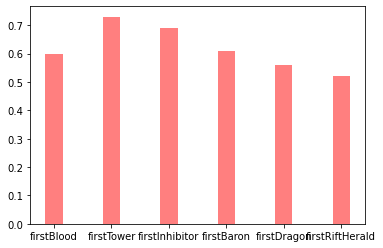

In [14]:
name_list = ['firstBlood','firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald']
num_list1 = [0.6,0.73,0.69,0.61,0.56,0.52]
bar_width=0.3
plt.bar(name_list, num_list1, bar_width, align="center", color="red", label="Yes", alpha=0.5)

# EDA with Heat Map and Principal Component Analysis

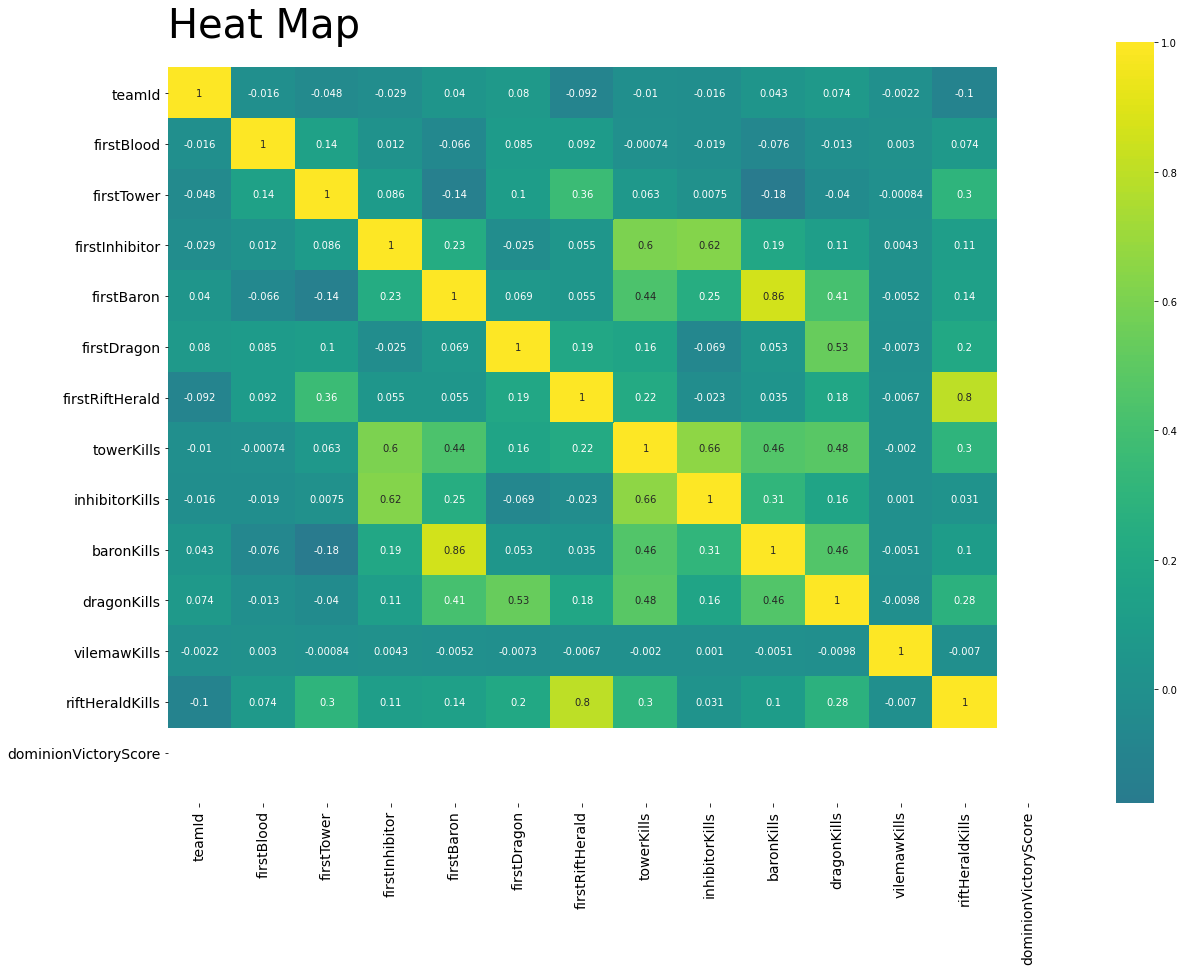

In [15]:
plt.figure(figsize=(20,14))
ax = sns.heatmap(df_win.corr(), cmap='viridis', center=0, annot=True)
bottom, top = ax.get_ylim()
plt.text(0,-0.6, "Heat Map", fontsize = 40, color='Black', fontstyle='normal')
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

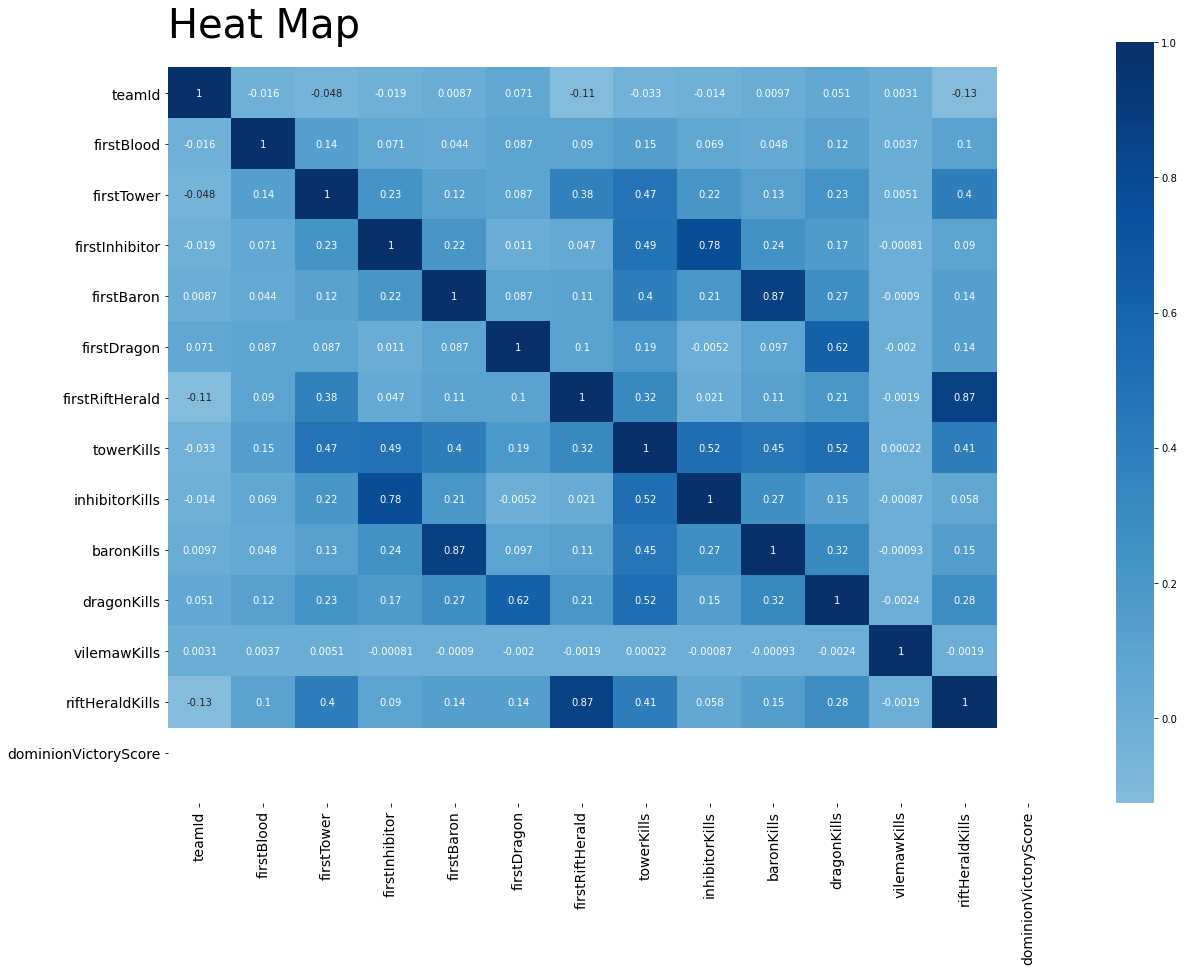

In [16]:
plt.figure(figsize=(20,14))
ax = sns.heatmap(df_lose.corr(), cmap='Blues', center=0, annot=True)
bottom, top = ax.get_ylim()
plt.text(0,-0.6, "Heat Map", fontsize = 40, color='Black', fontstyle='normal')
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler
x = df_win.values
x.shape

(108829, 15)

In [18]:
scaler = StandardScaler()
scaler.fit(x)
x_scaled= scaler.transform(x)

In [19]:
from sklearn.decomposition import PCA
pca_8 = PCA(n_components=8, random_state=2020)
pca_8.fit(x_scaled)
x_pca_8 =pca_8.transform(x_scaled)

In [20]:
print("explained_variance:")
print(pca_8.explained_variance_)

print("explained_variance_ratio:")
print(pca_8.explained_variance_ratio_)

print("total explained variance ratio of first 8 principal components:")
print(sum(pca_8.explained_variance_ratio_))

explained_variance:
[3.32630157 2.11716031 1.58796932 1.1354744  0.99991913 0.94862024
 0.91239316 0.68807169]
explained_variance_ratio:
[0.255867   0.16285699 0.12215036 0.08734338 0.07691615 0.07297012
 0.07018344 0.05292811]
total explained variance ratio of first 8 principal components:
0.9012155509380884


In [21]:
print("Variance explained by all 8 principal component=", sum(pca_8.explained_variance_ratio_*100))

Variance explained by all 8 principal component= 90.12155509380884


In [22]:
pca_8.explained_variance_ratio_*100

array([25.58670005, 16.28569891, 12.21503634,  8.73433818,  7.69161495,
        7.29701172,  7.0183444 ,  5.29281055])

In [23]:
np.cumsum(pca_8.explained_variance_ratio_*100)

array([25.58670005, 41.87239897, 54.0874353 , 62.82177348, 70.51338843,
       77.81040015, 84.82874454, 90.12155509])

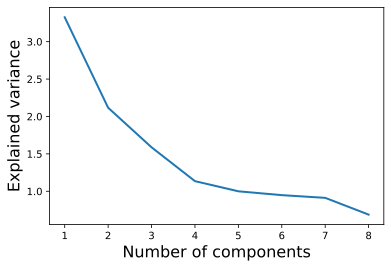

In [24]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.arange(1,9),pca_8.explained_variance_,linewidth=2)
plt.xlabel('Number of components', fontsize=16)
plt.ylabel('Explained variance', fontsize=16)
plt.show()

In [25]:
W = pca_8.components_
np.round(np.dot(W,np.transpose(W)),6)

array([[ 1., -0., -0., -0.,  0., -0.,  0.,  0.],
       [-0.,  1., -0., -0., -0.,  0.,  0.,  0.],
       [-0., -0.,  1.,  0.,  0., -0.,  0.,  0.],
       [-0., -0.,  0.,  1.,  0.,  0., -0., -0.],
       [ 0., -0.,  0.,  0.,  1., -0.,  0.,  0.],
       [-0.,  0., -0.,  0., -0.,  1., -0., -0.],
       [ 0.,  0.,  0., -0.,  0., -0.,  1., -0.],
       [ 0.,  0.,  0., -0.,  0., -0., -0.,  1.]])

In [26]:
data = {'Explained variance':[25.58670005, 41.87239897, 54.0874353 , 62.82177348, 70.51338843,
       77.81040015, 84.82874454, 90.12155509],
       'Number of components':[0,1,2,3,4,5,6,7]}
df = pd.DataFrame(data)
print(df)

   Explained variance  Number of components
0           25.586700                     0
1           41.872399                     1
2           54.087435                     2
3           62.821773                     3
4           70.513388                     4
5           77.810400                     5
6           84.828745                     6
7           90.121555                     7


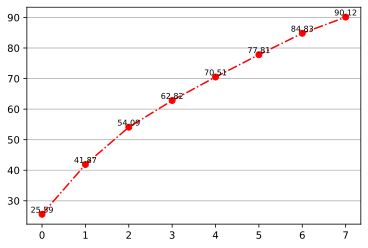

In [27]:
df['Explained variance'].plot(style='-.ro')
plt.grid(axis='y')
for a,b in zip(df['Number of components'],df['Explained variance']):
    plt.text(a, b+0.001, '%.2f' % b, ha='center', va= 'bottom',fontsize=8)
plt.show()

In [28]:
print('Variance explained by the First principal component =',np.cumsum(pca_8.explained_variance_ratio_*100)[0])
print('Variance explained by the First 2 principal component =',np.cumsum(pca_8.explained_variance_ratio_*100)[1])
print('Variance explained by the First 4 principal component =',np.cumsum(pca_8.explained_variance_ratio_*100)[3])
print('Variance explained by the First 8 principal component =',np.cumsum(pca_8.explained_variance_ratio_*100)[7])

Variance explained by the First principal component = 25.58670005479864
Variance explained by the First 2 principal component = 41.87239896542279
Variance explained by the First 4 principal component = 62.82177348253748
Variance explained by the First 8 principal component = 90.12155509380884


# Random Forest

In [29]:
df_match= pd.read_csv("C:\\Users\\17890\\Desktop\\CS668\\match_data_version1.csv")
df_match[['firstBlood', 'firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald']] = df_match[['firstBlood', 'firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald']].astype(int)
df_match = df_match.drop(columns="teamId")
df_match = df_match.drop(columns="gameId")
df_match.head(10)

,result,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore
0,Win,0,1,1,0,1,1,9,1,0,3,0,2,0
1,Win,0,0,0,0,1,1,4,0,0,2,0,2,0
2,Win,1,1,1,0,1,1,5,1,0,2,0,2,0
3,Win,1,1,0,0,0,1,6,0,1,3,0,1,0
4,Win,1,1,1,1,1,1,11,3,2,2,0,2,0
5,Win,1,1,1,0,0,1,8,1,0,2,0,2,0
6,Win,1,0,1,1,1,0,7,1,1,4,0,1,0
7,Win,1,1,1,1,0,0,10,2,1,2,0,1,0
8,Win,1,1,1,1,0,1,8,1,1,3,0,1,0
9,Win,0,1,0,0,1,1,4,0,0,1,0,2,0


In [30]:
from sklearn.model_selection import train_test_split

#train_ratio = 0.34
#validation_ratio = 0.33
#test_ratio = 0.33

X_train, X_test, y_train, y_test = train_test_split(df_match.drop('result', axis=1), 
                                                    df_match['result'], 
                                                    test_size=0.33, random_state=42)

#X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

X_test.shape

(71824, 13)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
model = RandomForestClassifier(max_depth=40,random_state=11).fit(X_train, y_train)

y_predicted = model.predict(X_test)

print('Accuracy: {:.3f}%'.format(accuracy_score(y_test, y_predicted)* 100))
confusion = confusion_matrix(y_test, y_predicted)
confusion

Accuracy: 87.469%


array([[31368,  4624],
       [ 4376, 31456]], dtype=int64)

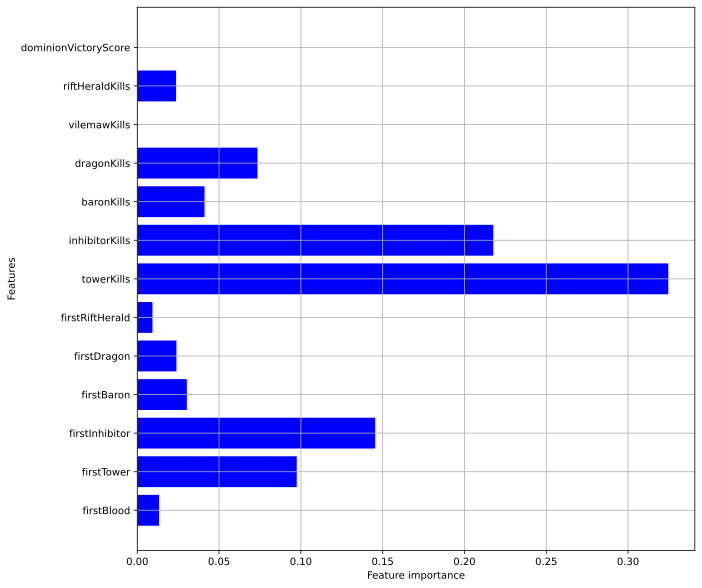

In [32]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(10, 10))
    plt.barh(range(n_features), model.feature_importances_, color='b', align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Features')
    plt.rcParams["figure.facecolor"] = "lightblue"
    plt.grid(True)
plot_feature_importances(model)

# Support Vectors Machine

In [33]:
df_match= pd.read_csv("C:\\Users\\17890\\Desktop\\CS668\\match_data_version1.csv")
df_match[['firstBlood', 'firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald']] = df_match[['firstBlood', 'firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald']].astype(int)
df_match = df_match.drop(columns="teamId")
df_match = df_match.drop(columns="gameId")

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_match.drop('result', axis=1), 
                                                    df_match['result'], 
                                                    test_size=0.33, random_state=42)

In [35]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [36]:
y_pred = svclassifier.predict(X_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,precision_score, recall_score, f1_score
print('Accuracy: {:.3f}%'.format(accuracy_score(y_test, y_pred)* 100))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 85.587%
[[31614  4378]
 [ 5974 29858]]
              precision    recall  f1-score   support

        Fail       0.84      0.88      0.86     35992
         Win       0.87      0.83      0.85     35832

    accuracy                           0.86     71824
   macro avg       0.86      0.86      0.86     71824
weighted avg       0.86      0.86      0.86     71824



# Logistic Regression

In [38]:
df_match= pd.read_csv("C:\\Users\\17890\\Desktop\\CS668\\match_data_version1.csv")
df_match[['firstBlood', 'firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald']] = df_match[['firstBlood', 'firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald']].astype(int)
df_match = df_match.drop(columns="teamId")
df_match = df_match.drop(columns="gameId")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_match.drop('result', axis=1), 
                                                    df_match['result'], 
                                                    test_size=0.33, random_state=42)

In [42]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, C=100)
classifier.fit(X_train, y_train)
coef = classifier.coef_[0]
coef1= abs(coef)
y_pred=classifier.predict(X_test)
print (coef1)

[0.4190678  1.02933251 1.01901052 0.94076672 0.56145421 0.0795142
 0.54839027 0.233995   0.77897007 0.00672241 0.00300257 0.34252309
 0.        ]


In [43]:
coeff = {'Features':['firstBlood', 'firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald','towerKills','inhibitorKills','baronKills','dragonKills','vilemawKills','riftHeraldKills','dominionVictoryScore'],
       'Coefficient':[0.42357207,1.02684267 ,1.02962152 ,0.91855797,0.55852845, 0.07172217,
  0.5484793, 0.23113365, 0.76793855,0.00718968 ,0.00363166, 0.34009182,
  0.   ]}

df= pd.DataFrame(coeff)
df.sort_values(by=['Coefficient'],ascending=False)

,Features,Coefficient
2,firstInhibitor,1.029622
1,firstTower,1.026843
3,firstBaron,0.918558
8,baronKills,0.767939
4,firstDragon,0.558528
6,towerKills,0.548479
0,firstBlood,0.423572
11,riftHeraldKills,0.340092
7,inhibitorKills,0.231134
5,firstRiftHerald,0.071722


In [41]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,precision_score, recall_score, f1_score
print('Accuracy: {:.3f}%'.format(accuracy_score(y_test, y_pred)* 100))
print(confusion_matrix(y_test,y_pred))

Accuracy: 85.700%
[[31477  4515]
 [ 5756 30076]]
